# 輸入DB密碼 

In [1]:
#cp -r /home/jovyan/edu-ofsn-wm/crv_tools /opt/conda/lib/python3.7/site-packages

In [3]:
from mlaas_tools.config_build import config_set
config_set()

input db password :  ········
input project name :  edu-ding


# 舊戶基金推薦流程

In [4]:
from experiments.old_cust_baseline.experiment_module import old_cust_CF_baseline

## CF資料載入: 

In [7]:
dataloader = old_cust_CF_baseline(today='2019-06-30', mode='dataload')

read key file
login as edu-justinyeh1995
packages in _define_operators: experiments.old_cust_baseline.dataloader.basic_edu.ops
[Connect] rawdata_conn,nav_start_dt,nav_end_dt,txn_start_dt,txn_end_dt,txn_amt_end_dt=collect_inputs_for_dataloader(rawdata_conn=rawdata_conn,nav_start_dt=nav_start_dt,nav_end_dt=nav_end_dt,txn_start_dt=txn_start_dt,txn_end_dt=txn_end_dt,txn_amt_end_dt=txn_amt_end_dt)
[Connect] w106=load_w106(rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w106.feather']
[Connect] w118=load_w118(nav_start_dt,nav_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w118.feather']
[Connect] w103=load_w103(txn_start_dt,txn_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w103.feather']
[Connect] cust_txn_amt=load_cust_txn_amt(txn_amt_end_dt,rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/cust_txn_amt.feather']


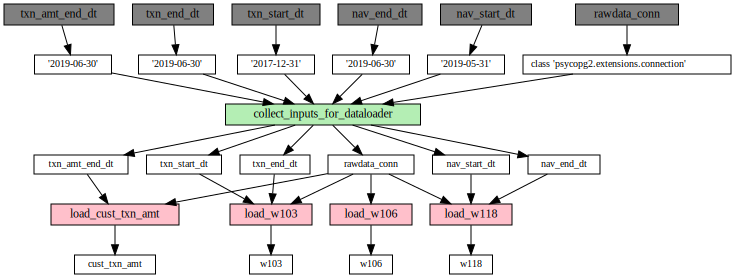

In [49]:
dataloader.pipe.view(summary=False) 

In [5]:
dataloader.pipe.cust_txn_amt.get() 
# 可以替換為其他參數以呈現其他表 (e.g., w103, w118, cust_txn_amt) 

,cust_no,wm_prod_code,txn_amt
0,N1DKNnY6jIP4nBLK4qdaYA==,KK56,156600.0
1,rS/Gpmn+3hjYhNfqiAKFuw==,BB39,261000.0
2,AdQYZAeCD/Faa8rrfBGb5A==,6509,3573960.0
3,wHoFRwxUDGqz1ovAhiAwdA==,2531,29000.0
4,xf4W3iGyjHG3bwhBIUiciA==,7104,1294850.0
...,...,...,...
197105,ovtVPH0UoVuHeYhPCmr04A==,5801,3216216.0
197106,kcJSkNvQcdJZTk0gULCyIA==,AF57,17400.0
197107,+dyw/yfVTV0u1SpYD8AIeg==,BB46,29000.0
197108,BanoHxc9DXr0HDWv57f9zg==,5813,2027542.0


In [6]:
cust_txn_amt = dataloader.pipe.cust_txn_amt.get() 
# 可以替換為其他參數以呈現其他表 (e.g., w103, w118, cust_txn_amt) 

## 前處理流程: 

In [8]:
preprocess = old_cust_CF_baseline(today='2019-06-30', mode='preprocess')

read key file
login as edu-justinyeh1995
packages in _define_operators: experiments.old_cust_baseline.dataloader.basic_edu.ops
[Connect] rawdata_conn,nav_start_dt,nav_end_dt,txn_start_dt,txn_end_dt,txn_amt_end_dt=collect_inputs_for_dataloader(rawdata_conn=rawdata_conn,nav_start_dt=nav_start_dt,nav_end_dt=nav_end_dt,txn_start_dt=txn_start_dt,txn_end_dt=txn_end_dt,txn_amt_end_dt=txn_amt_end_dt)
[Connect] w106=load_w106(rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w106.feather']
[Connect] w118=load_w118(nav_start_dt,nav_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w118.feather']
[Connect] w103=load_w103(txn_start_dt,txn_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w103.feather']
[Connect] cust_txn_amt=load_cust_txn_amt(txn_amt_end_dt,rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/cust_txn_amt.feather']
packages in _define_operators: experiments.old_cus

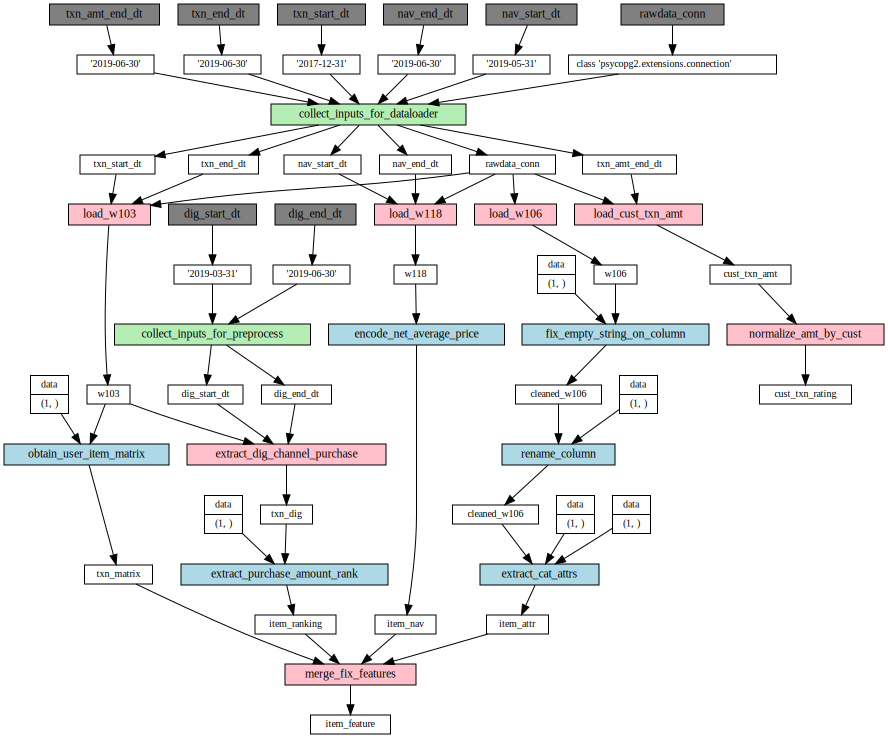

In [51]:
preprocess.pipe.view(summary=False)  

### 前處理結果

In [9]:
# 基金特徵向量(item_feature)
preprocess.pipe.item_feature.get(verbose=True, load_tmp=True) 

[LOAD] result of "load_w103"
 from data/old_cust_baseline/dataloader/tmp/w103.feather
[RUN] process of "obtain_user_item_matrix"
[COMPLETE] obtain_user_item_matrix
[LOAD] result of "load_w106"
 from data/old_cust_baseline/dataloader/tmp/w106.feather
[RUN] process of "fix_empty_string_on_column"
[COMPLETE] fix_empty_string_on_column
[REMOVE] result of "load_w106"
[RUN] process of "rename_column"
[COMPLETE] rename_column
[REMOVE] result of "fix_empty_string_on_column"
[RUN] process of "extract_cat_attrs"
[COMPLETE] extract_cat_attrs
[REMOVE] result of "rename_column"
[LOAD] result of "extract_dig_channel_purchase"
 from data/old_cust_baseline/preprocess/tmp/txn_dig.feather
[RUN] process of "extract_purchase_amount_rank"
[COMPLETE] extract_purchase_amount_rank
[REMOVE] result of "extract_dig_channel_purchase"
[LOAD] result of "load_w118"
 from data/old_cust_baseline/dataloader/tmp/w118.feather
[RUN] process of "encode_net_average_price"
[COMPLETE] encode_net_average_price
[REMOVE] result 

,item_id,++++2rDzc1I9amUGBhmxLA==,++1QLn8bCFzxWN8vQYBuRg==,++2WLG2lyrgp9jhLkCFEKg==,++3bvnatF8Ie6ZC/bs3rcA==,++4SYu9hQTAeizFgnBR2kw==,++7FzPdZNv2Gw99EJ/ZUUg==,++CMupqsf6sDqNchf+by8w==,++GMXRROXNCZtHYs3ymfyg==,++GZwPiWQxnKY2tXthUm6Q==,...,50%_50%_flag3,50%_50%_flag4,75%_75%_flag1,75%_75%_flag2,75%_75%_flag3,75%_75%_flag4,max_max_flag1,max_max_flag2,max_max_flag3,max_max_flag4
0,1101,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1102,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1103,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1104,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1107,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,ZA18,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2303,ZA20,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2304,ZA24,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2305,ZB01,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
# 顧客基金申購多寡的分數 (cust_txn_rating)
preprocess.pipe.cust_txn_rating.get(verbose=True, load_tmp=True)  

[LOAD] result of "load_cust_txn_amt"
 from data/old_cust_baseline/dataloader/tmp/cust_txn_amt.feather
[RUN] process of "normalize_amt_by_cust"
[COMPLETE] normalize_amt_by_cust
[REMOVE] result of "load_cust_txn_amt"
[SAVE] result of "normalize_amt_by_cust"
 as data/old_cust_baseline/preprocess/tmp/cust_txn_rating.feather
[SAVE] result of "normalize_amt_by_cust"
in memory


,user_id,item_id,rating
0,N1DKNnY6jIP4nBLK4qdaYA==,KK56,0.219512
1,rS/Gpmn+3hjYhNfqiAKFuw==,BB39,0.097276
2,AdQYZAeCD/Faa8rrfBGb5A==,6509,0.381265
3,wHoFRwxUDGqz1ovAhiAwdA==,2531,0.083333
4,xf4W3iGyjHG3bwhBIUiciA==,7104,0.488886
...,...,...,...
197105,ovtVPH0UoVuHeYhPCmr04A==,5801,0.138524
197106,kcJSkNvQcdJZTk0gULCyIA==,AF57,0.025641
197107,+dyw/yfVTV0u1SpYD8AIeg==,BB46,1.000000
197108,BanoHxc9DXr0HDWv57f9zg==,5813,0.129965


## 模型計算 

In [15]:
model = old_cust_CF_baseline(today='2019-06-30', mode='model')

read key file
login as edu-justinyeh1995
packages in _define_operators: experiments.old_cust_baseline.dataloader.basic_edu.ops
[Connect] rawdata_conn,nav_start_dt,nav_end_dt,txn_start_dt,txn_end_dt,txn_amt_end_dt=collect_inputs_for_dataloader(rawdata_conn=rawdata_conn,nav_start_dt=nav_start_dt,nav_end_dt=nav_end_dt,txn_start_dt=txn_start_dt,txn_end_dt=txn_end_dt,txn_amt_end_dt=txn_amt_end_dt)
[Connect] w106=load_w106(rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w106.feather']
[Connect] w118=load_w118(nav_start_dt,nav_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w118.feather']
[Connect] w103=load_w103(txn_start_dt,txn_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w103.feather']
[Connect] cust_txn_amt=load_cust_txn_amt(txn_amt_end_dt,rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/cust_txn_amt.feather']
packages in _define_operators: experiments.old_cus

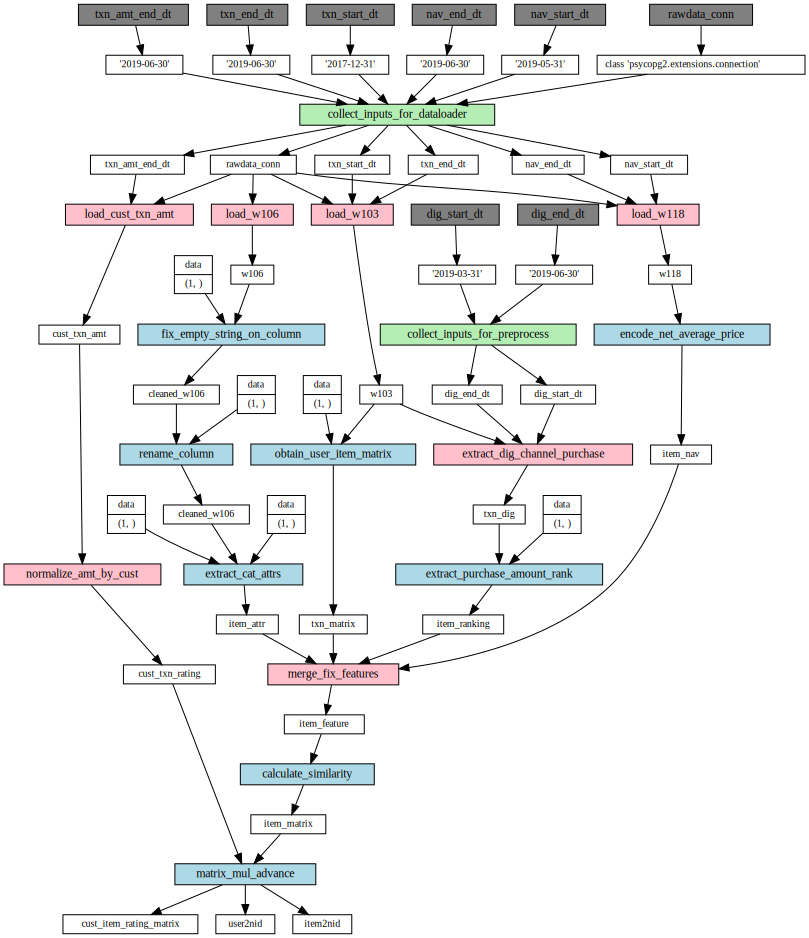

In [86]:
model.pipe.view(summary=False) 

### 模型結果 

In [54]:
# 基金對顧客的喜好分數 
model.pipe.cust_item_rating_matrix.get(load_tmp=True) 

array([[0.04706724, 0.05855582, 0.07135201, ..., 0.11608699, 0.02965045,
        0.06974021],
       [0.01232911, 0.01090325, 0.01225539, ..., 0.02594599, 0.02131476,
        0.04653885],
       [0.03226569, 0.03561422, 0.05565789, ..., 0.08947873, 0.16927279,
        0.08069852],
       ...,
       [0.00519566, 0.00407002, 0.0041658 , ..., 0.05990199, 0.01454666,
        0.02647319],
       [0.0373408 , 0.05850179, 0.06736331, ..., 0.02690691, 0.01742427,
        0.01902606],
       [0.01431261, 0.00448471, 0.00459025, ..., 0.00825067, 0.00534294,
        0.05250693]])

In [30]:
# 顧客id對應到position id 表
model.pipe.user2nid.get(load_tmp=True) 

,index
user_id,
N1DKNnY6jIP4nBLK4qdaYA==,0
rS/Gpmn+3hjYhNfqiAKFuw==,1
AdQYZAeCD/Faa8rrfBGb5A==,2
wHoFRwxUDGqz1ovAhiAwdA==,3
xf4W3iGyjHG3bwhBIUiciA==,4
...,...
dDi/D8cdse4Rrl31oZWssQ==,70816
MKjEy0MDs5bsuiFOcVsy9w==,70817
AYujr5KkFVJIdtPoZ92aZg==,70818


In [6]:
# 基金id對應到position id 表
model.pipe.item2nid.get(load_tmp=True)  

,index
item_id,
1101,0
1102,1
1103,2
1104,3
1107,4
...,...
ZA18,2302
ZA20,2303
ZA24,2304


## 排序與初步篩選 

In [7]:
rank_n_filter = old_cust_CF_baseline(today='2019-06-30', mode='all')

read key file
login as edu-justinyeh1995
packages in _define_operators: experiments.old_cust_baseline.dataloader.basic_edu.ops
[Connect] rawdata_conn,nav_start_dt,nav_end_dt,txn_start_dt,txn_end_dt,txn_amt_end_dt=collect_inputs_for_dataloader(rawdata_conn=rawdata_conn,nav_start_dt=nav_start_dt,nav_end_dt=nav_end_dt,txn_start_dt=txn_start_dt,txn_end_dt=txn_end_dt,txn_amt_end_dt=txn_amt_end_dt)
[Connect] w106=load_w106(rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w106.feather']
[Connect] w118=load_w118(nav_start_dt,nav_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w118.feather']
[Connect] w103=load_w103(txn_start_dt,txn_end_dt,rawdata_conn=rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/w103.feather']
[Connect] cust_txn_amt=load_cust_txn_amt(txn_amt_end_dt,rawdata_conn) [Result Dir] ['data/old_cust_baseline/dataloader/tmp/cust_txn_amt.feather']
packages in _define_operators: experiments.old_cus

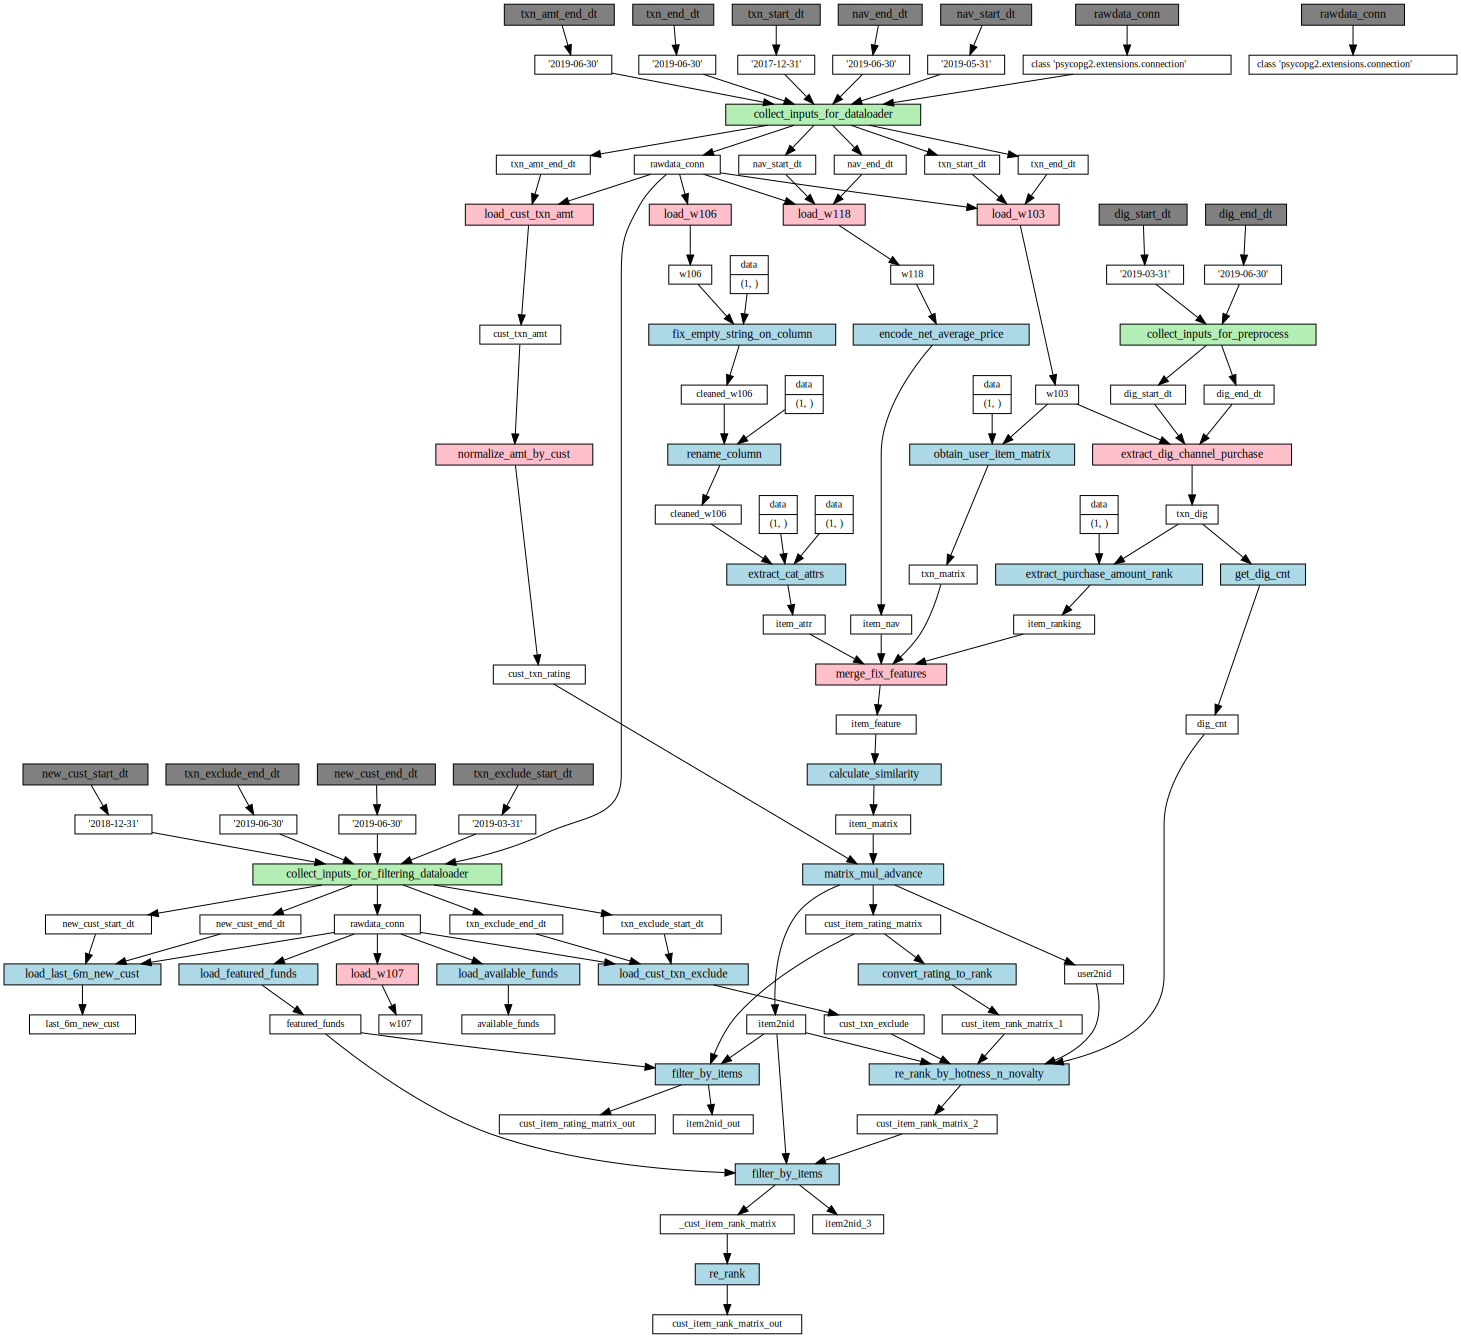

In [5]:
rank_n_filter.pipe.view(summary=False) 

### 排序與初篩後結果 

In [7]:
# 基金排序結果 
rank_n_filter.pipe.cust_item_rank_matrix_out.get() 

/project/edu-ofsn-wm/edu_framework/experiments/old_cust_baseline/process_utils/mat_op.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table[column_name] = to_nid_mapper.loc[table[column_name]].values


(70819, 2306)
(70821, 2307)


AssertionError: 

In [8]:
# 顧客基金喜好分數 
rank_n_filter.pipe.cust_item_rating_matrix_out.get()  

TypeError: 'NoneType' object is not iterable

In [69]:
# 顧客id對應到position id 表
rank_n_filter.pipe.user2nid.get(verbose=True, load_tmp=True)    

[LOAD] result of "normalize_amt_by_cust"
 from data/old_cust_baseline/preprocess/tmp/cust_txn_rating.feather
[LOAD] result of "merge_fix_features"
 from data/old_cust_baseline/preprocess/tmp/item_feature.feather
[RUN] process of "calculate_similarity"
[COMPLETE] calculate_similarity
[REMOVE] result of "merge_fix_features"
[RUN] process of "matrix_mul_advance"
[COMPLETE] matrix_mul_advance
[REMOVE] result of "normalize_amt_by_cust"
[REMOVE] result of "calculate_similarity"
[RUN] process of "matrix_mul_advance[1]"
[COMPLETE] matrix_mul_advance[1]
[REMOVE] result of "matrix_mul_advance"


,index
user_id,
N1DKNnY6jIP4nBLK4qdaYA==,0
rS/Gpmn+3hjYhNfqiAKFuw==,1
AdQYZAeCD/Faa8rrfBGb5A==,2
wHoFRwxUDGqz1ovAhiAwdA==,3
xf4W3iGyjHG3bwhBIUiciA==,4
...,...
dDi/D8cdse4Rrl31oZWssQ==,70816
MKjEy0MDs5bsuiFOcVsy9w==,70817
AYujr5KkFVJIdtPoZ92aZg==,70818


In [68]:
# 基金id對應到position id 表
rank_n_filter.pipe.item2nid_out.get()

InterfaceError: connection already closed

In [9]:
import pandas as pd
import numpy as np
# 顧客id對應到position id 表
user_id_map = pd.Series(rank_n_filter.pipe.user2nid.get(verbose=True, load_tmp=True).index.values).to_dict()    

[LOAD] result of "normalize_amt_by_cust"
 from data/old_cust_baseline/preprocess/tmp/cust_txn_rating.feather
[LOAD] result of "merge_fix_features"
 from data/old_cust_baseline/preprocess/tmp/item_feature.feather
[RUN] process of "calculate_similarity"
[COMPLETE] calculate_similarity
[REMOVE] result of "merge_fix_features"
[RUN] process of "matrix_mul_advance"
[COMPLETE] matrix_mul_advance
[REMOVE] result of "normalize_amt_by_cust"
[REMOVE] result of "calculate_similarity"
[RUN] process of "matrix_mul_advance[1]"
[COMPLETE] matrix_mul_advance[1]


In [10]:
# 基金id對應到position id 表
item_id_map = pd.Series(model.pipe.item2nid.get().index.values).to_dict()

In [94]:
#item_id_map 

In [11]:
# 顧客基金喜好分數 
score = model.pipe.cust_item_rating_matrix.get()
#score.shape

In [12]:
from rec_utils import recommendation_all
pred = recommendation_all(score, user_id_map, item_id_map)

100%|██████████| 70821/70821 [00:00<00:00, 238206.20it/s]


In [13]:
from evaluation import Evaluation
evaluation = Evaluation('2019-06-30', pred)

read key file
login as edu-justinyeh1995


In [14]:
evaluation.results()

100%|██████████| 70821/70821 [00:00<00:00, 732427.60it/s]


0.028426596630945905